# Automatidata - Exploratory Data Analysis

This work continues the investigation started in the stage of the preliminary data summary, focusing on further analyzing the data and uncovering more details about the variables. The purpose is to carry out exploratory data analysis (EDA) on the dataset supplied by the NYC Taxi and Limousine Commission. Professional data visualizations are created to tell a story and aid data-driven decision-making for business objectives.

In [516]:
import warnings
warnings.filterwarnings('ignore')

In [517]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [518]:
# reading the data
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [520]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [521]:
# converting data columns to datetime
df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

# creating a column for the trip duration
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])

# creating a column for the trip duration in minutes
df["trip_dur_minutes"] = df["trip_duration"].dt.total_seconds() / 60

Some of the data visualizations that are most useful for understanding this data include bar charts, box plots and scatter plots. Box plots help identify outliers and show where most data points lie for variables like `trip_distance`, `duration` and `total_amount`. Scatter plots allow us to observe trends, patterns and outliers between variables such as `trip_distance` and `total_amount`. Bar charts are useful for identifying average trip numbers across different timeframes (e.g. monthly, weekdays, weekends).

<Axes: title={'center': 'Total Amount Boxplot'}, xlabel='total_amount'>

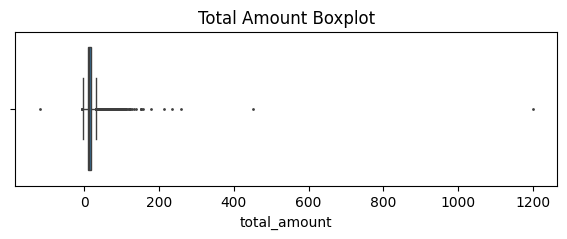

In [522]:
# creating box plot for the total amount
plt.figure(figsize=(7,2))
plt.title("Total Amount Boxplot")
sns.boxplot(x=df["total_amount"], fliersize=1)

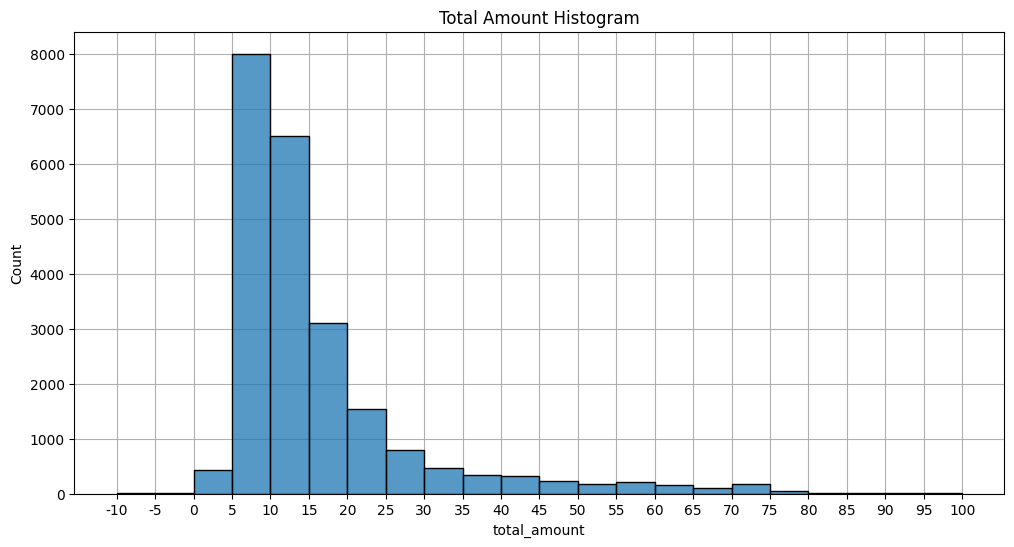

In [523]:
# creating histogram for the total amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df["total_amount"], bins=range(-10,101,5), zorder=3)
plt.title("Total Amount Histogram")
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.grid(zorder=0)

<Axes: title={'center': 'Trip Distance Boxplot'}, xlabel='trip_distance'>

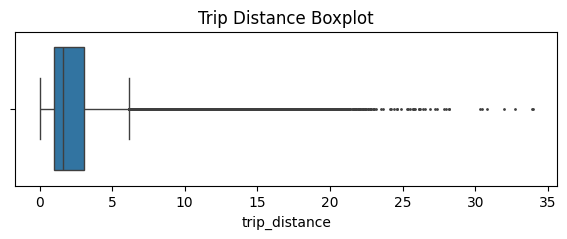

In [524]:
# creating box plot for the trip distance
plt.figure(figsize=(7,2))
plt.title("Trip Distance Boxplot")
sns.boxplot(data=None, x=df["trip_distance"], fliersize=1)

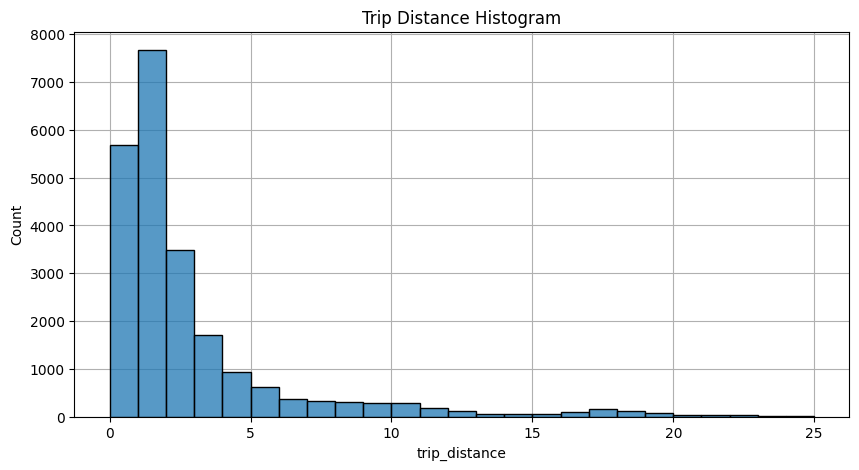

In [525]:
# creating histogram for the trip distance
plt.figure(figsize=(10,5))
sns.histplot(df["trip_distance"], bins=range(0,26,1), zorder=3)
plt.title("Trip Distance Histogram")
plt.grid(zorder=0)

<Axes: title={'center': 'Tip Amount Boxplot'}, xlabel='tip_amount'>

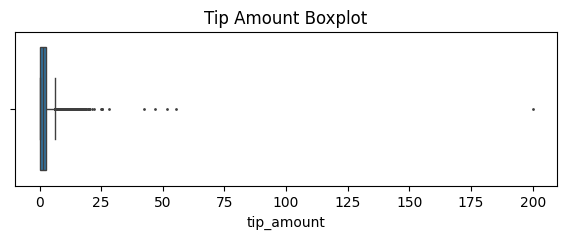

In [526]:
# creating box plot for the tip amount
plt.figure(figsize=(7,2))
plt.title("Tip Amount Boxplot")
sns.boxplot(x=df["tip_amount"], fliersize=1)

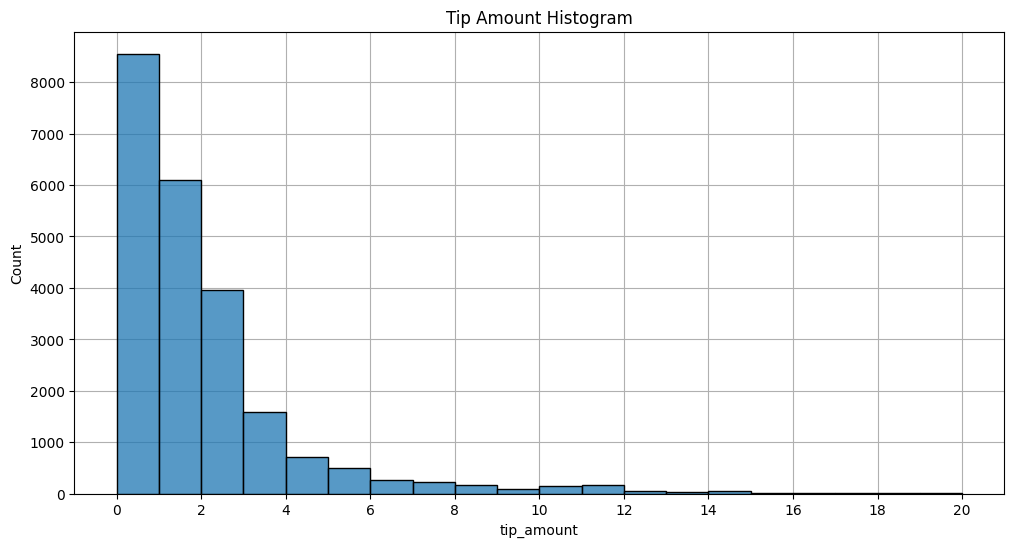

In [527]:
# creating histogram for the tip amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df["tip_amount"], bins=range(0,21,1), zorder=3)
plt.title("Tip Amount Histogram")
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.grid(zorder=0)

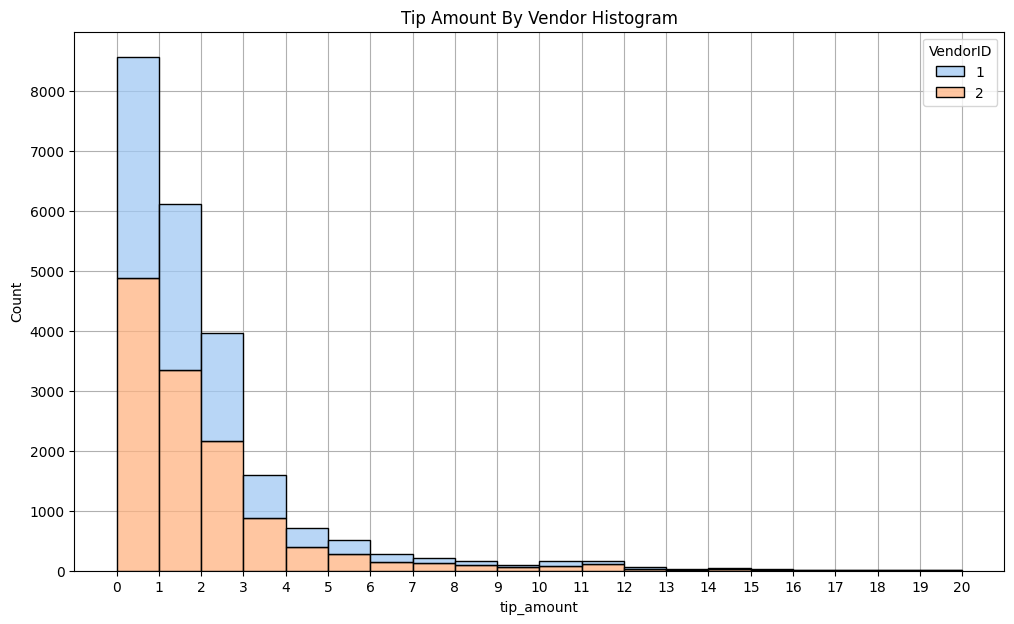

In [528]:
# creating histogram for the tip amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x="tip_amount", bins=range(0,21,1),
                  hue="VendorID",
                  multiple="stack",
                  palette="pastel",
                  zorder=3)
plt.title("Tip Amount By Vendor Histogram")
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.grid(zorder=0)

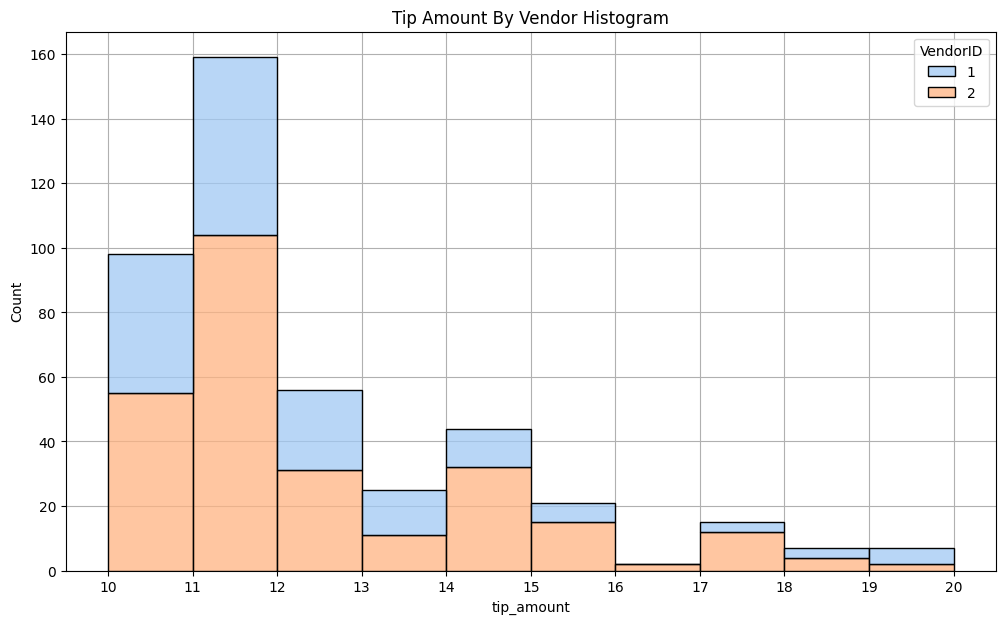

In [529]:
# creating histogram for the tip amount by vendor for tips greater than $10
tips_over_ten = df[df["tip_amount"] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten,
                  x="tip_amount",
                  bins=range(10,21,1),
                  hue="VendorID",
                  multiple="stack",
                  palette="pastel",
                  zorder=3)
plt.title("Tip Amount By Vendor Histogram")
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.grid(zorder=0)

In [530]:
df["passenger_count"].value_counts()

,count
passenger_count,
1,16117
2,3305
5,1143
3,953
6,693
4,455
0,33


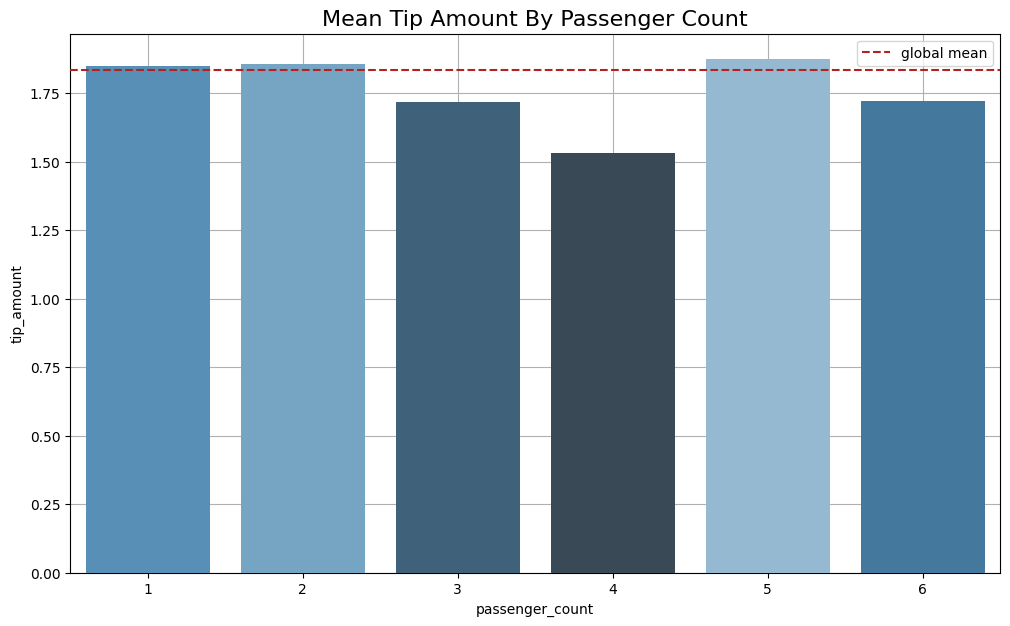

In [531]:
# calculating the mean tips by passenger count
mean_tips_by_passenger_count = df.groupby(["passenger_count"]).mean(numeric_only=True)[["tip_amount"]]

# creating bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Blues_d", len(data))
rank = data["tip_amount"].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
                 y=data["tip_amount"],
                 palette=np.array(pal[::-1])[rank],
                 zorder=3)
ax.axhline(df["tip_amount"].mean(), ls="--", color="firebrick", label="global mean", zorder=5)
plt.title("Mean Tip Amount By Passenger Count", fontsize=16)
ax.legend()
plt.grid(zorder=0)

Most taxi trips are less than two miles long and the number of trips decreases significantly for distances beyond two miles. The cost distribution also skews right, with most fares between \$5 and \$15. Tip amounts are also right-skewed, with nearly all tips falling between \$0 and \$3. Separating tips by vendor shows no significant differences in tip distribution. Vendor two handles slightly more rides and this ratio holds across all tip amounts. Looking at the highest tip amounts, vendor one does not receive significantly more of the top tips. The distribution remains consistent except at the highest tip levels, but this is not notable due to the small sample size. About two-thirds of trips have one passenger, but there were nearly 700 trips with six passengers. Additionally, 33 trips recorded zero passengers, which is not odd. These cases should be removed unless there is a reasonable explanation. Mean tip amounts don not vary significantly by passenger count, except for rides with four passengers, where the tip amount drops. This fluctuation is expected, as there are fewer four-passenger trips in the dataset (besides trips with zero passengers).

In [532]:
# days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# months
month_order = ["January", "February", "March",
               "April", "May", "June",
               "July", "August", "September",
               "October", "November", "December"]

In [533]:
# creating a column for the day
df["day"] = df["tpep_pickup_datetime"].dt.day_name()

# calculating the total number of rides for each day
daily_rides = df["day"].value_counts().reindex(index=day_order)

# calculating the total amount for each day
total_amount_day = df.groupby("day").sum(numeric_only=True)[["total_amount"]].reindex(index=day_order)

# creating a column for the month
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

# calculating the total number of rides for each month
monthly_rides = df["month"].value_counts().reindex(index=month_order)

# calculating the total amount for each month
total_amount_month = df.groupby("month").sum(numeric_only=True)[["total_amount"]].reindex(index=month_order)

In [534]:
daily_rides

,count
day,
Monday,2931
Tuesday,3198
Wednesday,3390
Thursday,3402
Friday,3413
Saturday,3367
Sunday,2998


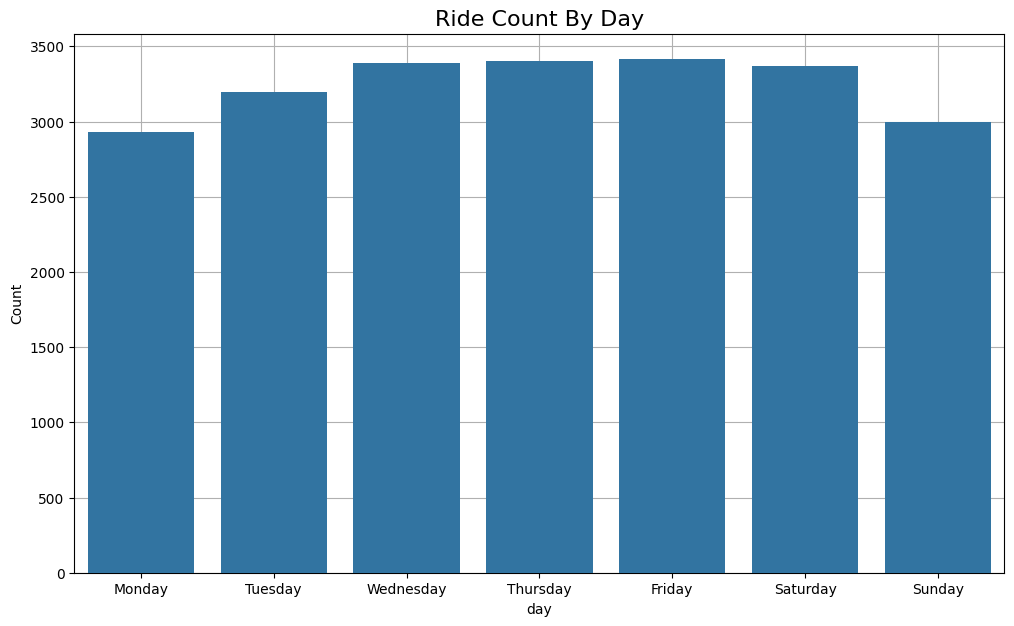

In [535]:
# creating a bar plot for the total rides per day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides, zorder=3)
plt.title("Ride Count By Day", fontsize=16)
ax.set_xticklabels(day_order)
ax.set_ylabel("Count")
plt.grid(zorder=0)

In [536]:
monthly_rides

,count
month,
January,1997
February,1769
March,2049
April,2019
May,2013
June,1964
July,1697
August,1724
September,1734


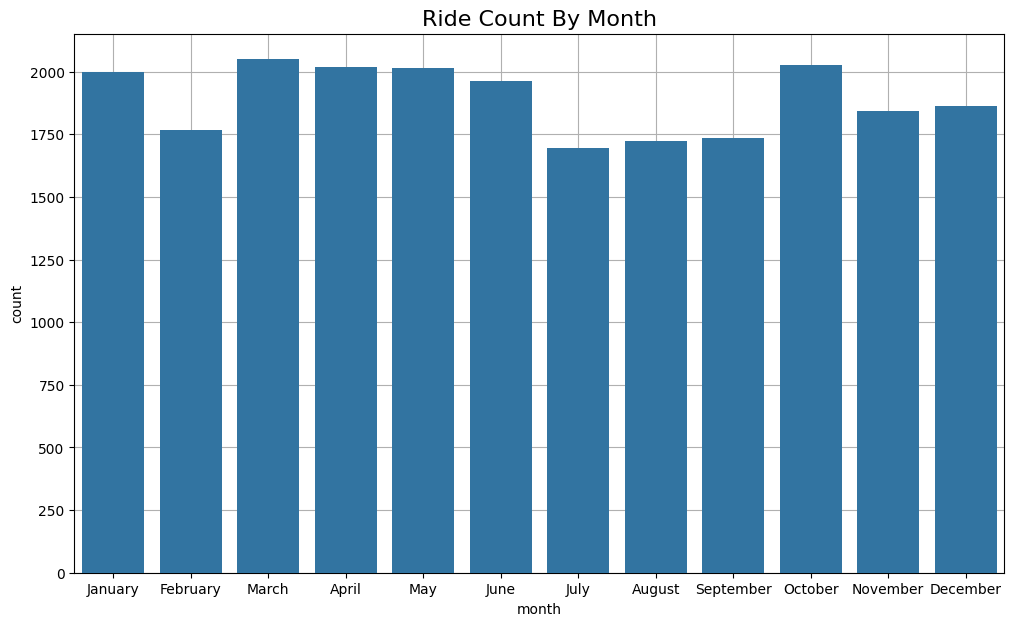

In [537]:
# creating a bar plot for the total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, zorder=3)
plt.title("Ride Count By Month", fontsize=16)
ax.set_xticklabels(month_order)
plt.grid(zorder=0)

In [538]:
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


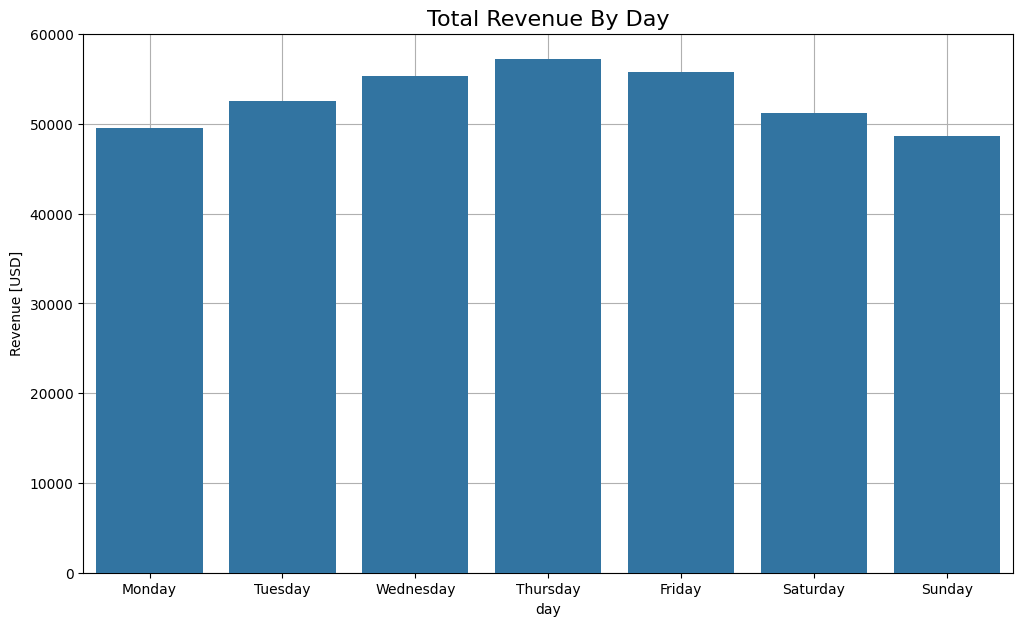

In [539]:
# creating a bar plot for the total revenue per day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day["total_amount"], zorder=3)
plt.title("Total Revenue By Day", fontsize=16)
ax.set_xticklabels(day_order)
ax.set_ylabel("Revenue [USD]")
plt.grid(zorder=0)

In [540]:
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


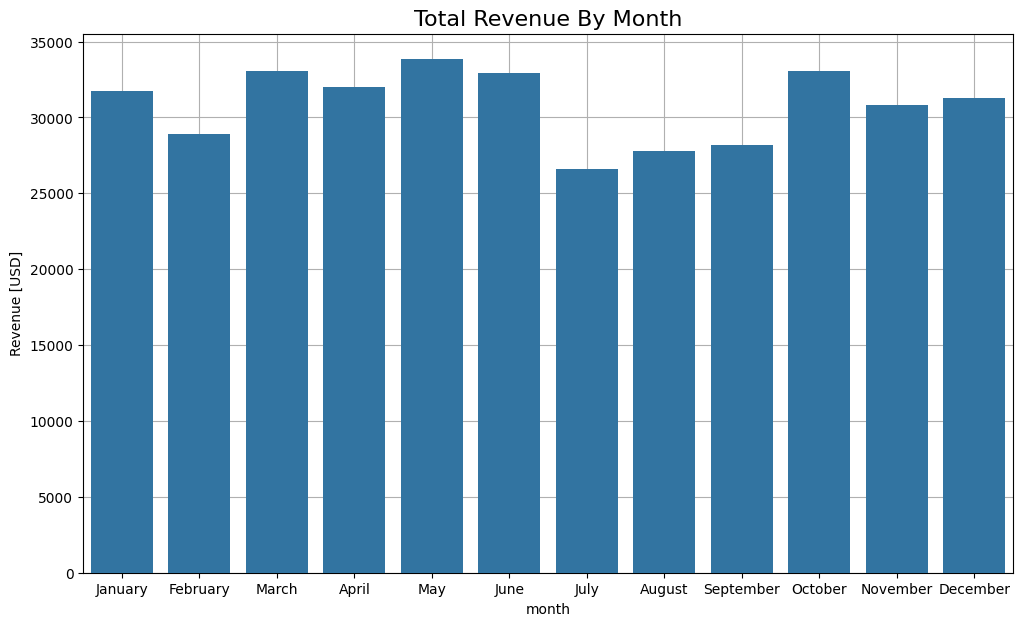

In [541]:
# creating a bar plot for the total revenue per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month["total_amount"], zorder=3)
plt.title("Total Revenue By Month", fontsize=16)
ax.set_xticklabels(month_order)
ax.set_ylabel("Revenue [USD]")
plt.grid(zorder=0)

Monthly trips remain consistent, with dips during July, August, September and February. Surprisingly, the highest number of trips occurs from Wednesday to Saturday, with Sunday and Monday having the least. Thursday generates the highest revenue, with Sunday and Monday bringing in the least. Even though Saturday had only 35 fewer rides than Thursday, it generated around $6,000 less in revenue (a drop of over 10%). Monthly revenue follows the trend of trip counts, with dips in July, August, September and February.

In [542]:
# getting the number of unique drop-off location IDs
df["DOLocationID"].nunique()

216

In [543]:
# calculating the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby("DOLocationID").mean(numeric_only=True)[["trip_distance"]]

# sorting the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by="trip_distance")

In [544]:
distance_by_dropoff.head()

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852


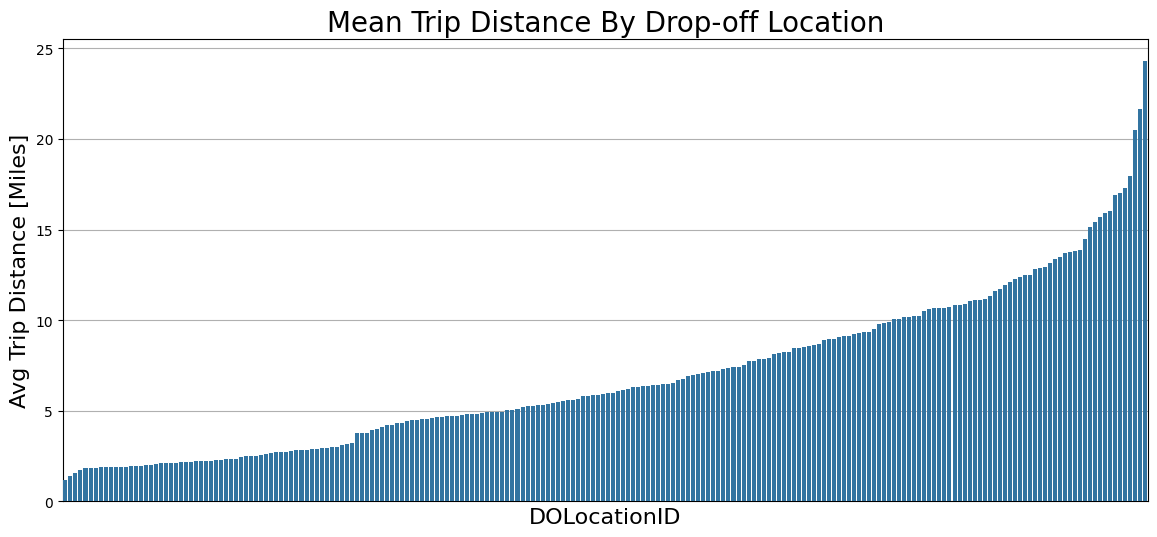

In [545]:
# creating a bar plot of mean trip distances by drop-off location in ascending order
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index,
                 y=distance_by_dropoff["trip_distance"],
                 order=distance_by_dropoff.index,
                 zorder=3)
plt.title("Mean Trip Distance By Drop-off Location", fontsize=20)
ax.set_xticks([])
plt.ylabel("Avg Trip Distance [Miles]", fontsize=16)
plt.xlabel("DOLocationID", fontsize=16)
plt.grid(zorder=0)

This chart for the mean trip distance in miles by drop-off location shows a characteristic curve of a cumulative density function for a normal distribution. This indicates that drop-off points are evenly distributed geographically, despite the lack of location data.

In [546]:
# calculating the mean trip duration for each drop-off location
duration_by_dropoff = df.groupby("DOLocationID").mean(numeric_only=True)[["trip_dur_minutes"]]

# sorting the results in descending order by mean trip duration
duration_by_dropoff = duration_by_dropoff.sort_values(by="trip_dur_minutes")

In [547]:
duration_by_dropoff.head()

,trip_dur_minutes
DOLocationID,
207,4.250000
184,6.633333
193,7.906481
157,8.244444
10,8.986111


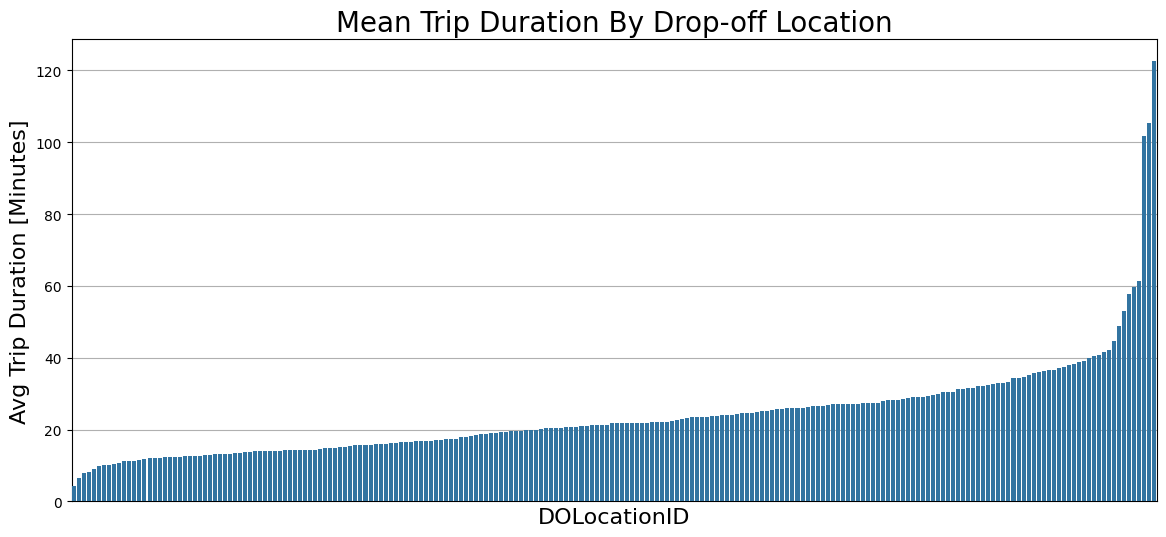

In [548]:
# creating a bar plot of mean trip durations (in minutes) by drop-off location in ascending order
plt.figure(figsize=(14,6))
ax = sns.barplot(x=duration_by_dropoff.index,
                 y=duration_by_dropoff["trip_dur_minutes"],
                 order=duration_by_dropoff.index,
                 zorder=3)
plt.title("Mean Trip Duration By Drop-off Location", fontsize=20)
ax.set_xticks([])
plt.ylabel("Avg Trip Duration [Minutes]", fontsize=16)
plt.xlabel("DOLocationID", fontsize=16)
plt.grid(zorder=0)

Similarly, the chart for the mean trip duration in minutes by drop-off location shows a characteristic curve of a cumulative density function for a normal distribution. This makes sense as the trip distance and the trip duration should be correlated to some degree.

In [549]:
# generating random points on a 2D plane from a normal distribution
norm_samples = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midpoint = int(len(norm_samples) / 2)   # calculating the midpoint of the array of coordinates
start = norm_samples[:midpoint]   # isolating the pick-up locations
end = norm_samples[midpoint:]   # isolating the drop-off locations

In [550]:
# calculating Euclidean distances between points in first half and second half of array
dists = (start - end)**2
dists = dists.sum(axis=-1)
dists = np.sqrt(dists)

In [551]:
# grouping the coordinates by "drop-off location" and computing mean distance
norm_df = pd.DataFrame( {"start": [tuple(x) for x in start.tolist()],
                         "end": [tuple(x) for x in end.tolist()],
                         "distance": dists} )
data = norm_df[["end", "distance"]].groupby("end").mean()
data = data.sort_values(by="distance")
data = data.reset_index()  # resetting index to a single column

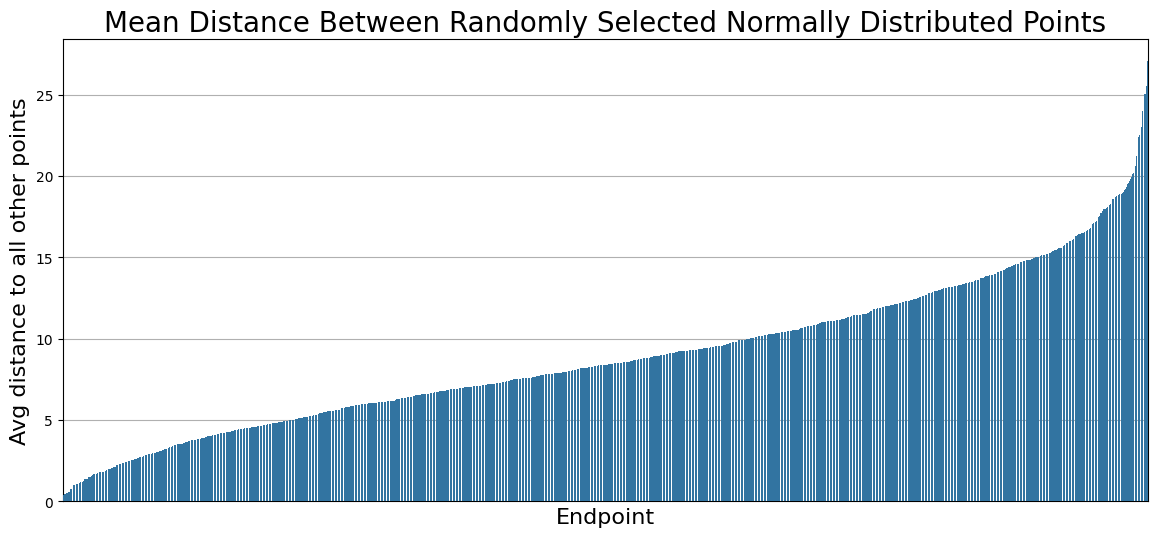

In [552]:
# plotting the mean distance between each endpoint ("drop-off location") and all connected points
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data["distance"],
                 order=data.index,
                 zorder=3)
ax.set_title("Mean Distance Between Randomly Selected Normally Distributed Points", fontsize=20)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("Endpoint", fontsize=16)
ax.set_ylabel("Avg distance to all other points", fontsize=16)
plt.grid(zorder=0)

The curve is similar to the pattern of average trip distances per drop-off location. This suggests that the drop-off points are evenly spread out. However, it does not imply that all locations receive an equal number of rides.

In [553]:
real_mu = distance_by_dropoff["trip_distance"].mean()
real_sigma = distance_by_dropoff["trip_distance"].std()

In [555]:
# generating random points on a 2D plane from a normal distribution
norm_samples = np.round(np.random.normal(real_mu, real_sigma, (434, 2)), 1)
midpoint = int(len(norm_samples) / 2)   # calculating the midpoint of the array of coordinates
start = norm_samples[:midpoint]   # isolating the pick-up locations
end = norm_samples[midpoint:]   # isolating the drop-off locations

In [556]:
# calculating Euclidean distances between points in first half and second half of array
dists = (start - end)**2
dists = dists.sum(axis=-1)
dists = np.sqrt(dists)

In [557]:
# grouping the coordinates by "drop-off location" and computing mean distance
norm_df = pd.DataFrame( {"start": [tuple(x) for x in start.tolist()],
                         "end": [tuple(x) for x in end.tolist()],
                         "distance": dists} )
data = norm_df[["end", "distance"]].groupby("end").mean()
data = data.sort_values(by="distance")
data = data.reset_index()  # resetting index to a single column

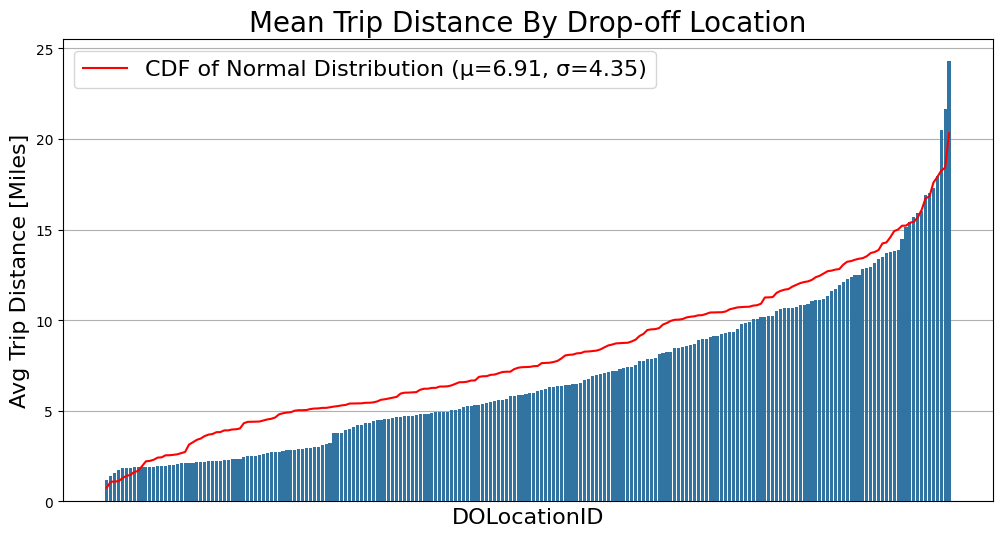

In [566]:
# creating a bar plot of mean trip distances by drop-off location in ascending order
plt.figure(figsize=(12,6))
ax = sns.barplot(x=distance_by_dropoff.index,
                 y=distance_by_dropoff["trip_distance"],
                 order=distance_by_dropoff.index,
                 zorder=3)

plt.plot(data.index,
         data["distance"],
         linestyle="-",
         color="r",
         label="CDF of Normal Distribution (μ=" + str(real_mu) + ", σ=" + str(real_sigma) + ")",
         zorder=5)

plt.title("Mean Trip Distance By Drop-off Location", fontsize=20)
ax.set_xticklabels([])
ax.set_xticks([])
plt.ylabel("Avg Trip Distance [Miles]", fontsize=16)
plt.xlabel("DOLocationID", fontsize=16)
ax.legend(fontsize=16)
plt.grid(zorder=0)

In [560]:
sorted_dropoffs = df["DOLocationID"].sort_values()
sorted_dropoffs = sorted_dropoffs.astype("str")

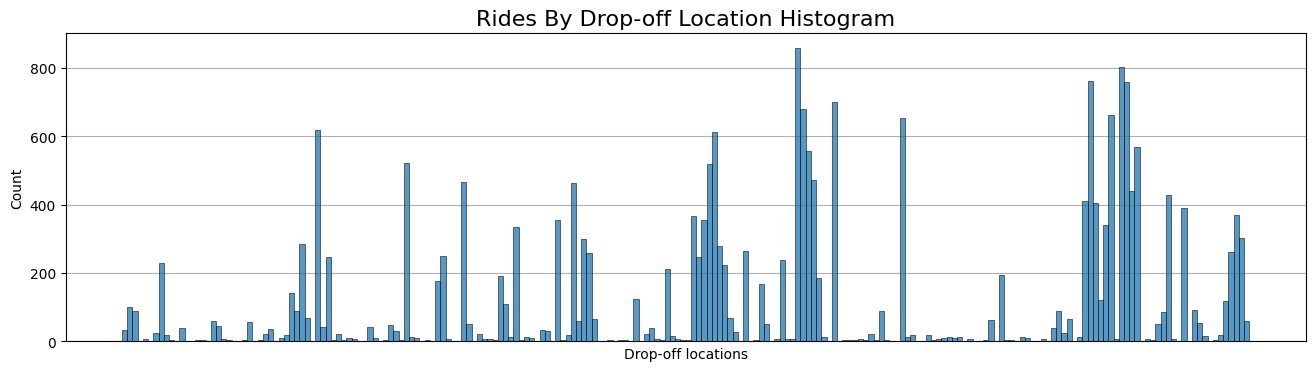

In [561]:
# creating a histogram for the number of rides per drop-off location
plt.figure(figsize=(16,4))
sns.histplot(sorted_dropoffs, bins=range(0, df["DOLocationID"].max()+1, 1), zorder=3)
plt.title("Rides By Drop-off Location Histogram", fontsize=16);
plt.xticks([])
plt.xlabel("Drop-off locations")
plt.grid(zorder=0)

There are 49 entries that do not represent valid drop-off locations. A small number of high-traffic locations account for most trips, likely near popular spots like Times Square, airports and train stations. Unfortunately, the dataset does not include the locations associated with these IDs, which would be helpful.

In [562]:
# filtering the points for the scatterplots
df_filtered = df[(df["total_amount"] >= 0) & (df["total_amount"] <= 200)]
df_filtered_dur = df_filtered[(df_filtered["trip_dur_minutes"] >= 0) & (df_filtered["trip_dur_minutes"] <= 150)]

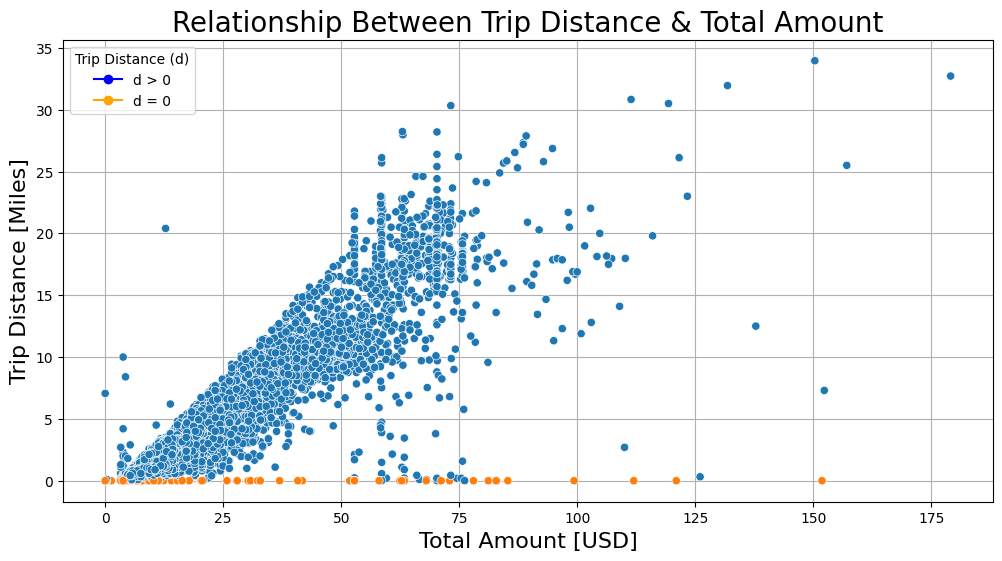

In [563]:
# creating the scatter plot for the trip distance and the total amount
plt.figure(figsize=(12,6))
scatter = sns.scatterplot( data=df_filtered,
                           x="total_amount",
                           y="trip_distance",
                           hue=(df_filtered["trip_distance"] == 0),
                           zorder=3 )
handles = [ plt.Line2D([], [], marker="o", color="b", label="d > 0"),
            plt.Line2D([], [], marker="o", color="orange", label="d = 0") ]
plt.legend(handles=handles, title="Trip Distance (d)")
plt.title("Relationship Between Trip Distance & Total Amount", fontsize=20)
plt.ylabel("Trip Distance [Miles]", fontsize=16)
plt.xlabel("Total Amount [USD]", fontsize=16)
plt.grid(zorder=0)

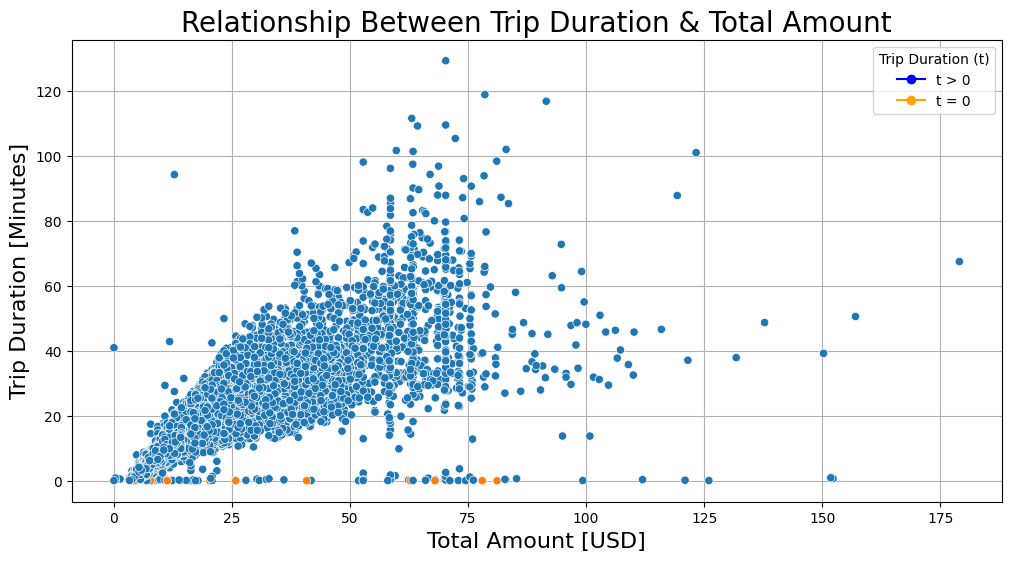

In [564]:
# creating the scatter plot for the trip duration (in minutes) and the total amount
plt.figure(figsize=(12,6))
sns.scatterplot( data=df_filtered_dur,
                 x="total_amount",
                 y="trip_dur_minutes",
                 hue=(df_filtered_dur["trip_dur_minutes"] == 0),
                 zorder=3 )
handles = [ plt.Line2D([], [], marker="o", color="b", label="t > 0"),
            plt.Line2D([], [], marker="o", color="orange", label="t = 0") ]
plt.legend(handles=handles, title="Trip Duration (t)")
plt.title("Relationship Between Trip Duration & Total Amount", fontsize=20)
plt.ylabel("Trip Duration [Minutes]", fontsize=16)
plt.xlabel("Total Amount [USD]", fontsize=16)
plt.grid(zorder=0)

In [565]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_dur_minutes,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,14.066667,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,26.500000,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,7.200000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,16.716667,Saturday,April
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.5,0.5,2.06,0.0,0.3,12.36,0 days 00:08:00,8.000000,Saturday,March
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,1.0,0.5,9.86,0.0,0.3,59.16,0 days 00:59:38,59.633333,Wednesday,May
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,1.0,0.5,1.78,0.0,0.3,19.58,0 days 00:21:59,21.983333,Tuesday,August
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.0,0.5,0.00,0.0,0.3,9.80,0 days 00:12:07,12.116667,Saturday,February
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.0,0.5,2.75,0.0,0.3,16.55,0 days 00:20:26,20.433333,Friday,November


Overall, we observe that most trips are under five miles, though there are outliers up to 35 miles. There are no missing values. Some trips show a distance of 0 which raises questions. EDA is essential because it helps data professionals familiarize themselves with the data, identify outliers, clean missing values and prepare the data for modeling. Finally, visualizations helped us understand that this dataset contains outliers and decisions will need to be made about how to handle them before modeling.